In [1]:
import numpy as np
import time
from matplotlib import pyplot as plt

import datasets
import nn
import nndemo_mnist
import optim

In [ ]:
np.random.seed(2)
plt.title('net.loss')
plt.xlabel('batches')
plt.ylabel('loss')
batch_size = 10
net = nndemo_mnist.Net()
trainset = datasets.MNIST(True, batch_size, True)
testset = datasets.MNIST(False)
optimizer = optim.Adam(net.parameters(), 0.001, 0.9, 0.9)
ts = np.eye(10)
epoch = 10
for e in range(epoch):
    net.state = 'train'
    t = time.time()
    for label, data in trainset:
        net.train(data, ts[label])
        optimizer.step()

    print('epoch: {}    use time: {:.3f}s'.format(e + 1, time.time() - t), end='')
    net.state = 'test'

    c = 0
    for label, data in testset:
        if np.argmax(net(data).tensor) == label:
            c += 1
    print(f'    Correct rate: {c / 100}%')
plt.scatter(np.arange(1, len(net.loss) + 1), np.array(net.loss) / batch_size, 3, marker='.')
plt.show()

In [ ]:
np.save(r'.\pth\net\net-fc1-w.npy', net.fc1.w)
np.save(r'.\pth\net\net-fc1-b.npy', net.fc1.b)
np.save(r'.\pth\net\net-fc2-w.npy', net.fc2.w)
np.save(r'.\pth\net\net-fc2-b.npy', net.fc2.b)
np.save(r'.\pth\net\net-fc3-w.npy', net.fc3.w)
np.save(r'.\pth\net\net-fc3-b.npy', net.fc3.b)
np.save(r'.\pth\net\net-loss.npy', np.array(net.loss))

data loading...done
Correct rate: 97.92%


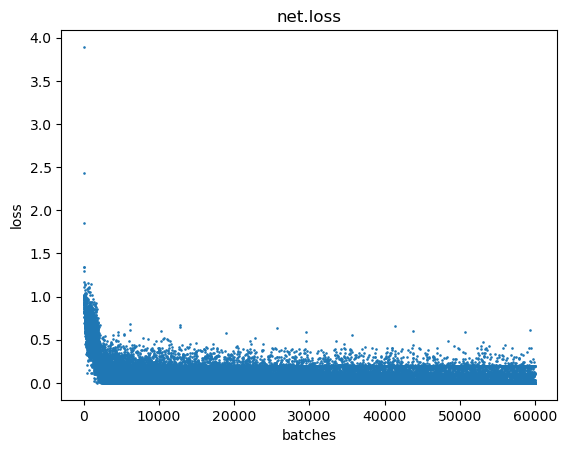

In [2]:
plt.title('net.loss')
plt.xlabel('batches')
plt.ylabel('loss')
batch_size = 10
net = nndemo_mnist.Net()
testset = datasets.MNIST(False)
optimizer = optim.Adam(net.parameters(), 0.001, 0.9, 0.9)
net.load()
c = 0
for label, data in testset:
    if np.argmax(net(data).tensor) == label:
        c += 1
print(f'Correct rate: {c / 100}%')
plt.scatter(np.arange(1, len(net.loss) + 1), net.loss / batch_size, 3, marker='.')
plt.show()